![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Demo: Produce SSH, gradients and Laplacian pdf </center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [2]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py

denoising_name = 'Unet_baseline'

<div class="alert alert-info" role="alert">

<h2>1. Read from regional data file </h2>

</div>

From: "../swot_data/swot_1j_share_'region'.nc"

In [3]:
path_data = '../swot_data/swot_1j_share_'+region_info['name']+'.nc'

orbit = '1d'

ds_SWOT = xr.open_mfdataset(path_data)
 

<div class="alert alert-info" role="alert">

<h2>2. Example on one day only (with plots) </h2>

</div>

In [4]:
date_plot = np.datetime64('2023-04-23')

ds_SWOT_1d = ds_SWOT.where(ds_SWOT.time>date_plot,drop=True)
ds_SWOT_1d = ds_SWOT_1d.where(ds_SWOT_1d.time<date_plot+np.timedelta64(1,'D'),drop=True) 

## Plots and pdf of SSH

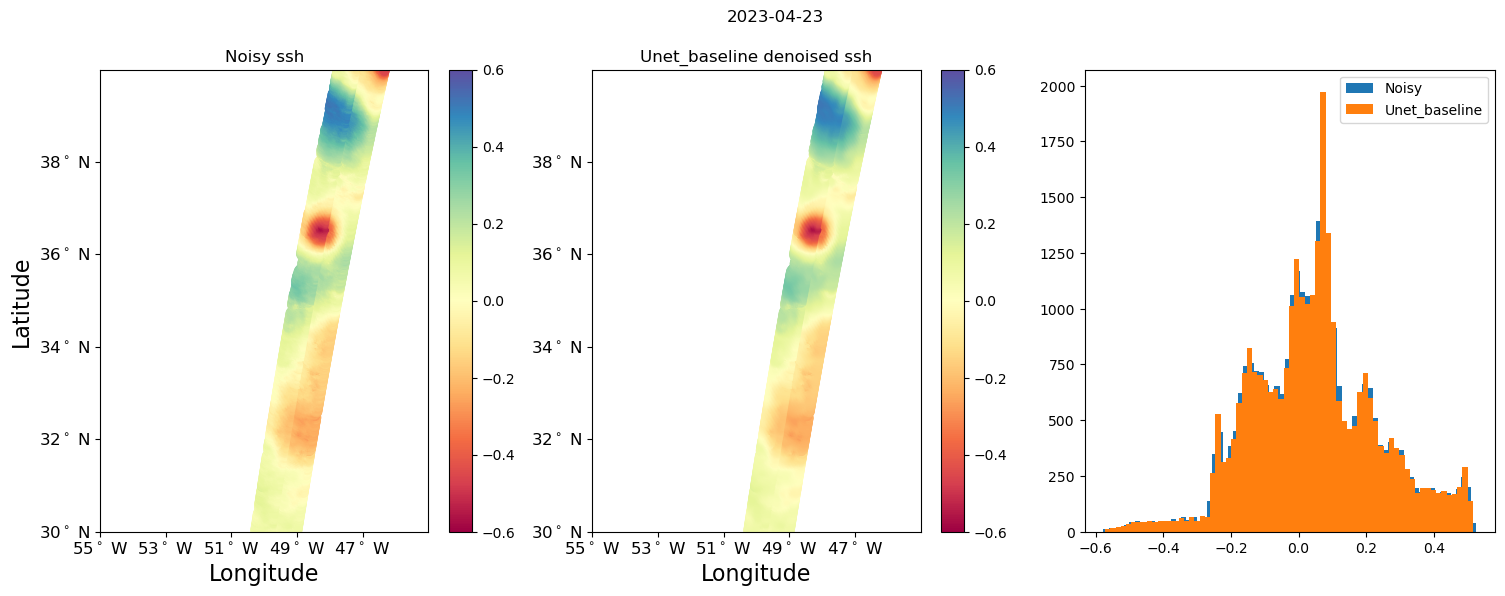

In [5]:
plt.figure(figsize=(18,6))
plt.suptitle(date_plot)

ax = plt.subplot(131)
plt.title('Noisy ssh')
plt.scatter(ds_SWOT_1d.longitude,ds_SWOT_1d.latitude,c=ds_SWOT_1d.ssha_new_editing,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar()
ax.set_xlim(region_info['lon_min'], region_info['lon_max'])
ax.set_ylim(region_info['lat_min'], region_info['lat_max'])
ax.set_xticks(range(region_info['lon_min'], region_info['lon_max'], 2))
ax.set_xticklabels(region_info['lon_ticks'],fontsize=12)
ax.set_yticks(range(region_info['lat_min'], region_info['lat_max'], 2))
ax.set_yticklabels(region_info['lat_ticks'],fontsize=12)
ax.set_xlabel('Longitude',fontsize=16)
ax.set_ylabel('Latitude',fontsize=16)

ax = plt.subplot(132)
plt.title(denoising_name+' denoised ssh')
plt.scatter(ds_SWOT_1d.longitude,ds_SWOT_1d.latitude,c=ds_SWOT_1d.ssha_denoised_unet,cmap='Spectral', vmin=-0.6, vmax =0.6) 
plt.colorbar()
ax.set_xlim(region_info['lon_min'], region_info['lon_max'])
ax.set_ylim(region_info['lat_min'], region_info['lat_max'])
ax.set_xticks(range(region_info['lon_min'], region_info['lon_max'], 2))
ax.set_xticklabels(region_info['lon_ticks'],fontsize=12)
ax.set_yticks(range(region_info['lat_min'], region_info['lat_max'], 2))
ax.set_yticklabels(region_info['lat_ticks'],fontsize=12)
ax.set_xlabel('Longitude',fontsize=16) 

ssh_noisy = np.ravel(ds_SWOT_1d.ssha_new_editing)
ssh_noisy = ssh_noisy[~np.isnan(ssh_noisy)]

ssh_denoised = np.ravel(ds_SWOT_1d.ssha_denoised_unet)
ssh_denoised = ssh_denoised[~np.isnan(ssh_denoised)]

plt.subplot(133)
plt.hist(ssh_noisy, bins='auto',label='Noisy')
plt.hist(ssh_denoised, bins='auto',label=denoising_name)  
plt.legend()

plt.savefig('../figures/plotpdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_'+str(date_plot)+'_ssh.png')

plt.show()


## Compute SSH gradients and Laplacian

In [6]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT_1d.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT_1d.ssha_denoised_unet)

## Plots and pdf of SSH gradients

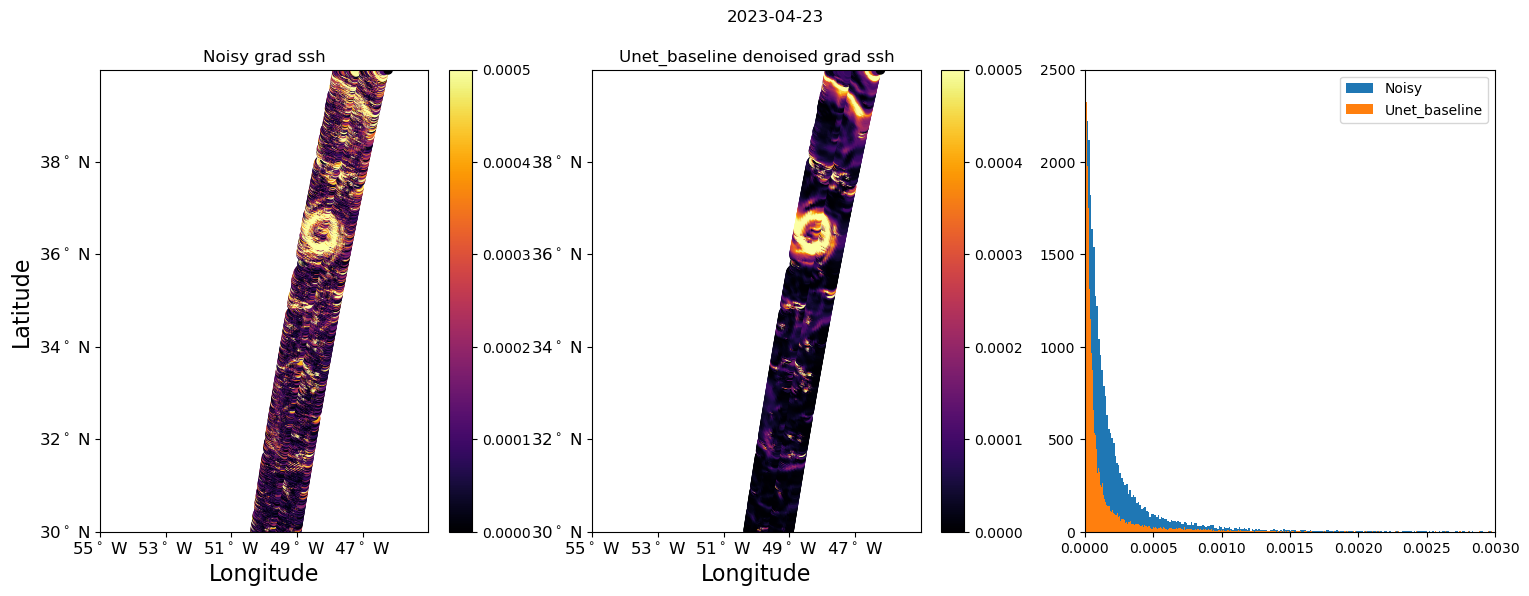

In [7]:
plt.figure(figsize=(18,6))
plt.suptitle(date_plot)

ax = plt.subplot(131)
plt.title('Noisy grad ssh')
plt.scatter(ds_SWOT_1d.longitude,ds_SWOT_1d.latitude,c=grad_new_editing,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()
ax.set_xlim(region_info['lon_min'], region_info['lon_max'])
ax.set_ylim(region_info['lat_min'], region_info['lat_max'])
ax.set_xticks(range(region_info['lon_min'], region_info['lon_max'], 2))
ax.set_xticklabels(region_info['lon_ticks'],fontsize=12)
ax.set_yticks(range(region_info['lat_min'], region_info['lat_max'], 2))
ax.set_yticklabels(region_info['lat_ticks'],fontsize=12)
ax.set_xlabel('Longitude',fontsize=16)
ax.set_ylabel('Latitude',fontsize=16)

ax = plt.subplot(132)
plt.title(denoising_name+' denoised grad ssh')
plt.scatter(ds_SWOT_1d.longitude,ds_SWOT_1d.latitude,c=grad_denoised_unet,cmap='inferno',vmin=0,vmax=0.0005) 
plt.colorbar()
 
ax.set_xlim(region_info['lon_min'], region_info['lon_max'])
ax.set_ylim(region_info['lat_min'], region_info['lat_max'])
ax.set_xticks(range(region_info['lon_min'], region_info['lon_max'], 2))
ax.set_xticklabels(region_info['lon_ticks'],fontsize=12)
ax.set_yticks(range(region_info['lat_min'], region_info['lat_max'], 2))
ax.set_yticklabels(region_info['lat_ticks'],fontsize=12)
ax.set_xlabel('Longitude',fontsize=16) 

grad_noisy = np.ravel(grad_new_editing)
grad_noisy = grad_noisy[~np.isnan(grad_noisy)]

grad_denoised = np.ravel(grad_denoised_unet)
grad_denoised = grad_denoised[~np.isnan(grad_denoised)]

plt.subplot(133)
plt.hist(grad_noisy, bins='auto',label='Noisy')
plt.hist(grad_denoised, bins='auto',label=denoising_name) 
plt.xlim(0,0.003)
plt.ylim(0,2500)
plt.legend()

plt.savefig('../figures/plotpdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_'+str(date_plot)+'_grad.png')

plt.show()

## Plots and pdf of SSH Laplacian

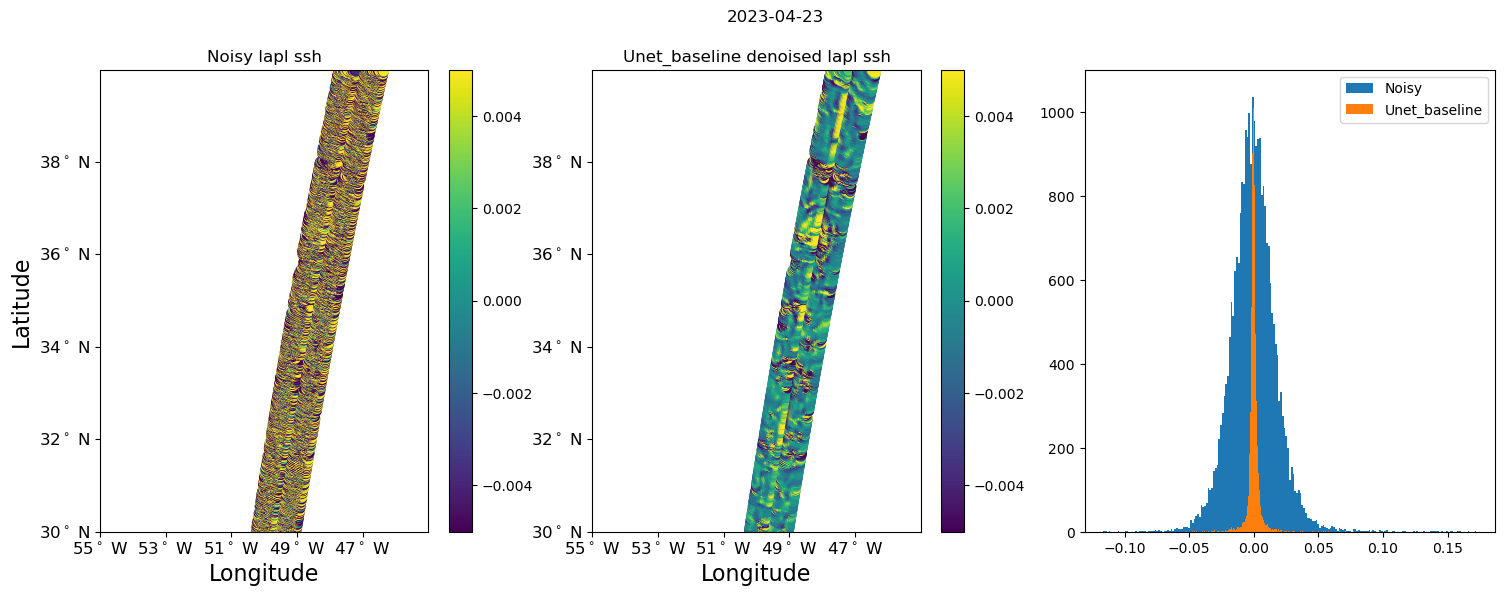

In [8]:
plt.figure(figsize=(18,6))
plt.suptitle(date_plot)

ax=plt.subplot(131)
plt.title('Noisy lapl ssh')
plt.scatter(ds_SWOT_1d.longitude,ds_SWOT_1d.latitude,c=lapl_new_editing,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()
ax.set_xlim(region_info['lon_min'], region_info['lon_max'])
ax.set_ylim(region_info['lat_min'], region_info['lat_max'])
ax.set_xticks(range(region_info['lon_min'], region_info['lon_max'], 2))
ax.set_xticklabels(region_info['lon_ticks'],fontsize=12)
ax.set_yticks(range(region_info['lat_min'], region_info['lat_max'], 2))
ax.set_yticklabels(region_info['lat_ticks'],fontsize=12)
ax.set_xlabel('Longitude',fontsize=16)
ax.set_ylabel('Latitude',fontsize=16)

ax=plt.subplot(132)
plt.title(denoising_name+' denoised lapl ssh')
plt.scatter(ds_SWOT_1d.longitude,ds_SWOT_1d.latitude,c=lapl_denoised_unet,cmap='viridis',vmin=-0.005,vmax=0.005) 
plt.colorbar()
ax.set_xlim(region_info['lon_min'], region_info['lon_max'])
ax.set_ylim(region_info['lat_min'], region_info['lat_max'])
ax.set_xticks(range(region_info['lon_min'], region_info['lon_max'], 2))
ax.set_xticklabels(region_info['lon_ticks'],fontsize=12)
ax.set_yticks(range(region_info['lat_min'], region_info['lat_max'], 2))
ax.set_yticklabels(region_info['lat_ticks'],fontsize=12)
ax.set_xlabel('Longitude',fontsize=16) 

lapl_noisy = np.ravel(lapl_new_editing)
lapl_noisy = lapl_noisy[~np.isnan(lapl_noisy)]

lapl_denoised = np.ravel(lapl_denoised_unet)
lapl_denoised = lapl_denoised[~np.isnan(lapl_denoised)]

plt.subplot(133)
plt.hist(lapl_noisy, bins='auto',label='Noisy') 
plt.hist(lapl_denoised, bins='auto',label=denoising_name) 
plt.legend()

plt.savefig('../figures/plotpdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_'+str(date_plot)+'_lapl.png')

plt.show()

<div class="alert alert-info" role="alert">

<h2>3. PDFs computed over all passes (1d orbit) </h2>

</div>

## Compute SSH gradients and Laplacian

In [9]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)

## Compute PDFs

In [10]:
ssh_noisy = np.ravel(ds_SWOT.ssha_new_editing)
ssh_noisy = ssh_noisy[~np.isnan(ssh_noisy)]

ssh_denoised = np.ravel(ds_SWOT.ssha_denoised_unet)
ssh_denoised = ssh_denoised[~np.isnan(ssh_denoised)]

grad_noisy = np.ravel(grad_new_editing)
grad_noisy = grad_noisy[~np.isnan(grad_noisy)]

grad_denoised = np.ravel(grad_denoised_unet)
grad_denoised = grad_denoised[~np.isnan(grad_denoised)]

lapl_noisy = np.ravel(lapl_new_editing)
lapl_noisy = lapl_noisy[~np.isnan(lapl_noisy)]

lapl_denoised = np.ravel(lapl_denoised_unet)
lapl_denoised = lapl_denoised[~np.isnan(lapl_denoised)]


## Plot PDFs' histograms

In [24]:
init_date = str(ds_SWOT.time[0,0].values.astype('datetime64[D]'))
end_date = str(ds_SWOT.time[-1,0].values.astype('datetime64[D]'))

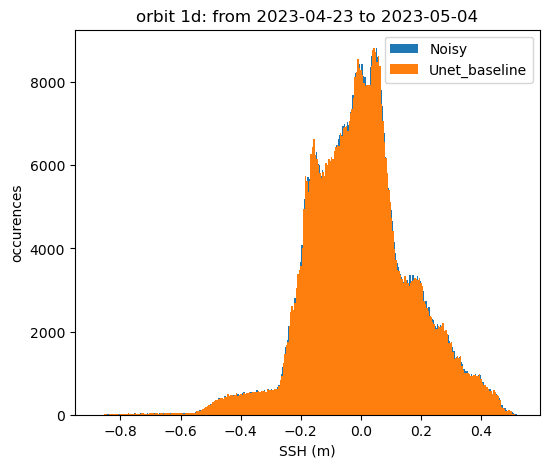

In [27]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)
plt.hist(ssh_noisy, bins='auto',label='Noisy')
plt.hist(ssh_denoised, bins='auto',label=denoising_name) 
plt.xlabel('SSH (m)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_ssh.png')
plt.show()

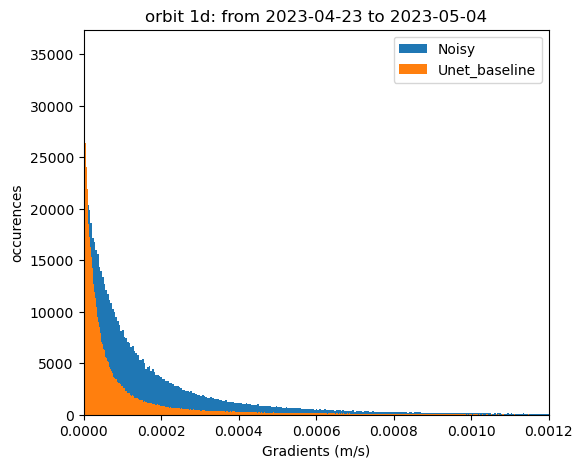

In [28]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(grad_noisy, bins='auto',label='Noisy')
plt.hist(grad_denoised, bins='auto',label=denoising_name) 
plt.xlim(0,0.0012)
plt.xlabel('Gradients (m/s)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_grad.png')
plt.show()

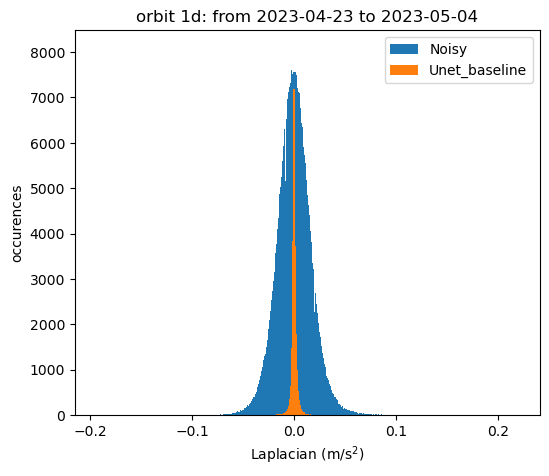

In [29]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(lapl_noisy, bins='auto',label='Noisy')
plt.hist(lapl_denoised, bins='auto',label=denoising_name) 
plt.xlabel('Laplacian (m/s$^2$)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_lapl.png')
plt.show()

<div class="alert alert-info" role="alert">

<h2>4. PDFs computed over all passes (21d orbit) </h2>

</div>

In [41]:
path_data = '../swot_data/swot_21j_share_'+region_info['name']+'.nc'

orbit = '21d'

ds_SWOT = xr.open_mfdataset(path_data)
 
init_date = str(ds_SWOT.time[0,0].values.astype('datetime64[D]'))
end_date = str(ds_SWOT.time[-1,-1].values.astype('datetime64[D]'))

In [32]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)


In [33]:
ssh_noisy = np.ravel(ds_SWOT.ssha_new_editing)
ssh_noisy = ssh_noisy[~np.isnan(ssh_noisy)]

ssh_denoised = np.ravel(ds_SWOT.ssha_denoised_unet)
ssh_denoised = ssh_denoised[~np.isnan(ssh_denoised)]

grad_noisy = np.ravel(grad_new_editing)
grad_noisy = grad_noisy[~np.isnan(grad_noisy)]

grad_denoised = np.ravel(grad_denoised_unet)
grad_denoised = grad_denoised[~np.isnan(grad_denoised)]

lapl_noisy = np.ravel(lapl_new_editing)
lapl_noisy = lapl_noisy[~np.isnan(lapl_noisy)]

lapl_denoised = np.ravel(lapl_denoised_unet)
lapl_denoised = lapl_denoised[~np.isnan(lapl_denoised)]


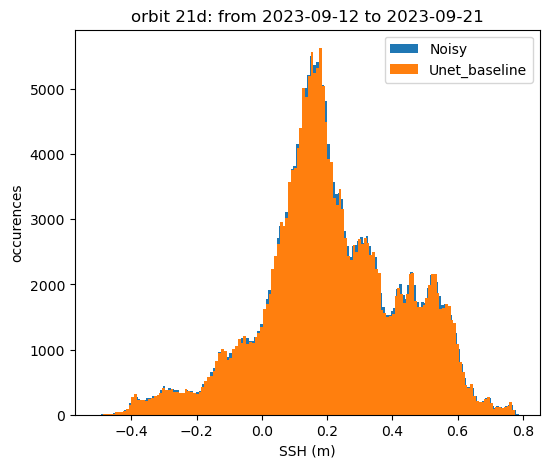

In [42]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)
plt.hist(ssh_noisy, bins='auto',label='Noisy')
plt.hist(ssh_denoised, bins='auto',label=denoising_name) 
plt.xlabel('SSH (m)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_ssh.png')
plt.show()

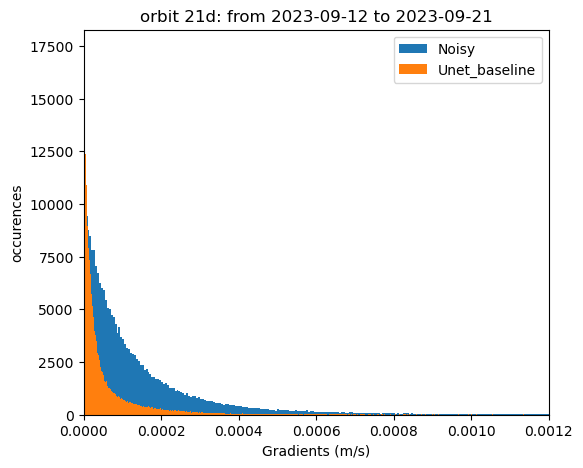

In [43]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(grad_noisy, bins='auto',label='Noisy')
plt.hist(grad_denoised, bins='auto',label=denoising_name) 
plt.xlim(0,0.0012)
plt.xlabel('Gradients (m/s)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_grad.png')
plt.show()

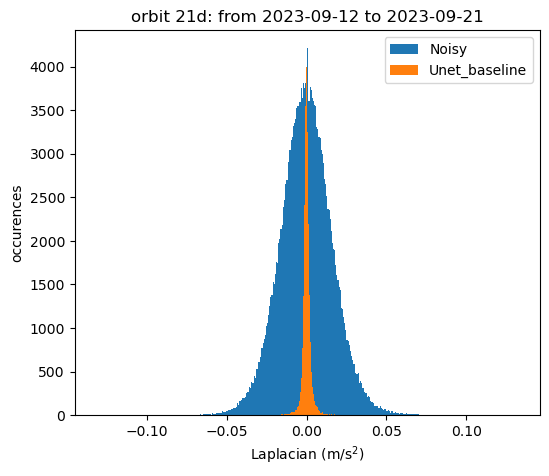

In [44]:
plt.figure(figsize=(6,5))
plt.title('orbit '+orbit+': from '+init_date+' to '+end_date)

plt.hist(lapl_noisy, bins='auto',label='Noisy')
plt.hist(lapl_denoised, bins='auto',label=denoising_name) 
plt.xlabel('Laplacian (m/s$^2$)')
plt.ylabel('occurences')
plt.legend()
plt.savefig('../figures/pdf_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_lapl.png')
plt.show()